## Importing essential libraries

In [1]:
#Importing essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

## Importing the dataset 

In [2]:
#Importing dataset - (source - kaggle)
data = pd.read_csv("/home/sagar/Desktop/Desk_folders/vf_activities/cars.csv")
data.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.


In [3]:
#Looking at the different features in data set
data.columns

Index(['mpg', ' cylinders', ' cubicinches', ' hp', ' weightlbs', ' time-to-60',
       ' year', ' brand'],
      dtype='object')

In [4]:
#Looking at the statistical properties of the data set
data.describe()

,mpg,cylinders,hp,time-to-60,year
count,261.000000,261.000000,261.000000,261.000000,261.000000
mean,23.144828,5.590038,106.360153,15.547893,1976.819923
std,7.823570,1.733310,40.499959,2.910625,3.637696
min,10.000000,3.000000,46.000000,8.000000,1971.000000
25%,16.900000,4.000000,75.000000,14.000000,1974.000000
50%,22.000000,6.000000,95.000000,16.000000,1977.000000
75%,28.800000,8.000000,138.000000,17.000000,1980.000000
max,46.600000,8.000000,230.000000,25.000000,1983.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           261 non-null    float64
 1    cylinders    261 non-null    int64  
 2    cubicinches  261 non-null    object 
 3    hp           261 non-null    int64  
 4    weightlbs    261 non-null    object 
 5    time-to-60   261 non-null    int64  
 6    year         261 non-null    int64  
 7    brand        261 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 16.4+ KB


In [6]:
#Finding out the number of missing values in the dataset
data.isnull().sum()

mpg             0
 cylinders      0
 cubicinches    0
 hp             0
 weightlbs      0
 time-to-60     0
 year           0
 brand          0
dtype: int64

In [7]:
#Removing the target variable from the dataset
X = data.iloc[:,:-1].values

X = pd.DataFrame(X)

X.columns = ['mpg', ' cylinders', ' cubicinches', ' hp', ' weightlbs', ' time-to-60', 'year']

X.head(10)

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
0,14,8,350,165,4209,12,1972
1,31.9,4,89,71,1925,14,1980
2,17,8,302,140,3449,11,1971
3,15,8,400,150,3761,10,1971
4,30.5,4,98,63,2051,17,1978
5,23,8,350,125,3900,17,1980
6,13,8,351,158,4363,13,1974
7,14,8,440,215,4312,9,1971
8,25.4,5,183,77,3530,20,1980
9,37.7,4,89,62,2050,17,1982


In [8]:
#Looking at the type of data
print(X.dtypes)

mpg             object
 cylinders      object
 cubicinches    object
 hp             object
 weightlbs      object
 time-to-60     object
year            object
dtype: object


In [9]:
#Converting data into numeric form

X['mpg'] = pd.to_numeric(X['mpg'])

X[' cylinders'] = pd.to_numeric(X[' cylinders'])

X = X.replace({" ":0})

X[' cubicinches'] = pd.to_numeric(X[' cubicinches'])

X[' hp'] = pd.to_numeric(X[' hp'])

# X[' weightlbs'] = X.replace({" ":0})
X[' weightlbs'] = pd.to_numeric(X[' weightlbs'])

X[' time-to-60'] = pd.to_numeric(X[' time-to-60'])

X['year'] = pd.to_numeric(X['year'])

In [10]:
X.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
0,14.0,8,350,165,4209,12,1972
1,31.9,4,89,71,1925,14,1980
2,17.0,8,302,140,3449,11,1971
3,15.0,8,400,150,3761,10,1971
4,30.5,4,98,63,2051,17,1978


## Finding out the value of k by using elbow method

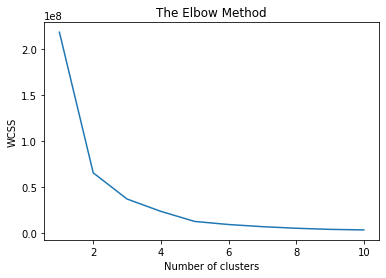

In [11]:
# Using the elbow method to find  the optimal number of clusters
wcss = [] #within cluster sum of squares - sum of sqaures of distance of all points from their cluster centroids.
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Applying the k-means clustering algorithm

In [12]:
# Applying k-means to the cars dataset
kmeans = KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0) 
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([0, 1, 2, 0, 1, 0, 0, 0, 2, 1, 1, 1, 0, 0, 1, 0, 1, 2, 1, 1, 1, 2,
       2, 0, 1, 1, 1, 0, 0, 1, 1, 2, 2, 1, 1, 2, 1, 2, 0, 2, 0, 0, 0, 2,
       2, 2, 0, 1, 1, 2, 0, 2, 0, 1, 0, 0, 2, 1, 1, 0, 2, 1, 2, 1, 0, 2,
       1, 1, 1, 0, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 0, 0, 2, 2, 1, 1, 2, 2,
       1, 2, 1, 1, 0, 2, 1, 0, 0, 2, 0, 0, 0, 0, 1, 1, 1, 2, 1, 1, 2, 2,
       1, 2, 0, 1, 1, 0, 2, 2, 1, 0, 1, 1, 0, 2, 1, 2, 0, 1, 2, 1, 1, 2,
       0, 0, 0, 0, 1, 2, 2, 2, 2, 1, 2, 1, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2,
       1, 2, 1, 1, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 1,
       0, 0, 0, 1, 2, 1, 0, 2, 1, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 2, 2, 0, 1, 0, 1, 2, 0, 2, 2, 2, 1, 1, 2, 2, 1, 0, 2, 0,
       2, 2, 0, 0, 0, 1, 0, 1, 2, 2, 0, 2, 2, 0, 2, 1, 0, 2, 1, 1, 0, 2,
       0, 2, 0, 2, 0, 1, 1, 2, 1, 2, 2, 0, 2, 1, 0, 1, 2, 2, 2],
      dtype=int32)

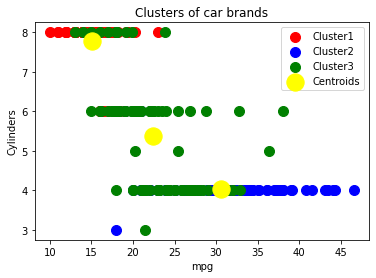

In [13]:
#Converting dataframe into array for boolean subsetting purpose for plotting
X = pd.DataFrame(X).to_numpy()

# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0,1],s=100,c='red',label='Cluster1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1,1],s=100,c='blue',label='Cluster2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2,1],s=100,c='green',label='Cluster3')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')
plt.title('Clusters of car brands')
plt.xlabel("mpg")
plt.ylabel("Cylinders")
plt.legend()
plt.show()

## Evaluation 

In [14]:
#Cobverting ground truth data to numeric format ( Target variable )

data = data.replace({" Japan.":2," Europe.":1," US.":0})

data.head()

# X[' cubicinches'] = X.replace({" ":0})

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,0
1,31.9,4,89,71,1925,14,1980,1
2,17.0,8,302,140,3449,11,1971,0
3,15.0,8,400,150,3761,10,1971,0
4,30.5,4,98,63,2051,17,1978,0


In [15]:
data[' brand'].value_counts()

0    162
2     51
1     48
Name:  brand, dtype: int64

In [16]:
#Average Rand Index

from sklearn.metrics.cluster import adjusted_rand_score

adjusted_rand_score(data[' brand'], y_kmeans)

0.1465247338760175

Perfect labeling would be scored 1 and bad labelling or independent labelling is scored 0 or negative.

In [17]:
#Mutual Information based score

#Normalised mutual information

from sklearn.metrics.cluster import normalized_mutual_info_score

print("Normalized mutual information score is")
print(normalized_mutual_info_score (data[' brand'], y_kmeans))

#Adjusted mutual information

from sklearn.metrics.cluster import adjusted_mutual_info_score

print("Adjusted mutual information score is")
print(adjusted_mutual_info_score (data[' brand'], y_kmeans))

Normalized mutual information score is
0.219547375419662
Adjusted mutual information score is
0.21348207644993486


In [18]:
#Silhouette Coefficient

from sklearn.metrics.cluster import silhouette_score

silhouette_score(X, y_kmeans, metric = 'euclidean')

0.5598153695280326